Iteration 0, Global Best Value: 20.271293587656345
Iteration 10, Global Best Value: 0.46485851644662546
Iteration 20, Global Best Value: 0.008299673345419478
Iteration 30, Global Best Value: 1.7905690150143982e-05
Iteration 40, Global Best Value: 1.6701479914615902e-06
Iteration 50, Global Best Value: 5.702801786355849e-09
Iteration 60, Global Best Value: 6.023910259500553e-10
Iteration 70, Global Best Value: 1.5631940186722204e-13
Iteration 80, Global Best Value: 0.0
Iteration 90, Global Best Value: 0.0

Final Global Best Position: [-1.09223312e-09 -2.96828417e-09]
Final Global Best Value: 0.0


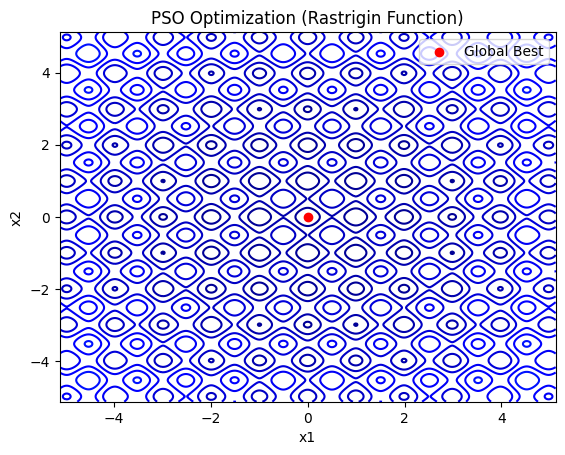

In [1]:
#rastrigin
#particle swarm optimization
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Rastrigin function as an example)
def rastrigin(x):
    A = 10
    return A * len(x) + sum(x_i**2 - A * np.cos(2 * np.pi * x_i) for x_i in x)

# PSO Parameters
n_particles = 30     # Number of particles
n_dimensions = 2     # Number of dimensions (parameters to optimize)
n_iterations = 100   # Number of iterations

w = 0.5              # Inertia weight
c1 = 1.5             # Cognitive coefficient (particle's own best position)
c2 = 1.5             # Social coefficient (global best position)
v_max = 2.0          # Maximum velocity

# Initialize particles' positions and velocities
positions = np.random.uniform(-5.12, 5.12, (n_particles, n_dimensions))
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Initialize personal best positions and global best position
pbest_positions = positions.copy()
pbest_values = np.apply_along_axis(rastrigin, 1, pbest_positions)

gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# PSO Main Loop
for t in range(n_iterations):
    # Evaluate fitness
    fitness_values = np.apply_along_axis(rastrigin, 1, positions)

    # Update personal bests
    for i in range(n_particles):
        if fitness_values[i] < pbest_values[i]:
            pbest_positions[i] = positions[i]
            pbest_values[i] = fitness_values[i]

    # Update global best
    min_fitness_idx = np.argmin(pbest_values)
    if pbest_values[min_fitness_idx] < gbest_value:
        gbest_position = pbest_positions[min_fitness_idx]
        gbest_value = pbest_values[min_fitness_idx]

    # Update velocity and position for each particle
    r1 = np.random.rand(n_particles, n_dimensions)
    r2 = np.random.rand(n_particles, n_dimensions)

    velocities = (w * velocities +
                  c1 * r1 * (pbest_positions - positions) +
                  c2 * r2 * (gbest_position - positions))

    # Apply velocity limits (optional)
    velocities = np.clip(velocities, -v_max, v_max)

    # Update positions
    positions = positions + velocities

    # Print the current best solution
    if t % 10 == 0:  # Print every 10 iterations
        print(f"Iteration {t}, Global Best Value: {gbest_value}")

# Final output
print(f"\nFinal Global Best Position: {gbest_position}")
print(f"Final Global Best Value: {gbest_value}")

# Plotting the optimization process (visualization for 2D case)
x_vals = np.linspace(-5.12, 5.12, 400)
y_vals = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rastrigin([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(0, 500, 50), cmap='jet')
plt.scatter(gbest_position[0], gbest_position[1], color='red', label='Global Best')
plt.title("PSO Optimization (Rastrigin Function)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


Iteration 0, Global Best Value: 0.561688815253214
Iteration 10, Global Best Value: 0.0012463131169123563
Iteration 20, Global Best Value: 0.0010586395841969065
Iteration 30, Global Best Value: 0.0009045648462530416
Iteration 40, Global Best Value: 0.0009045648462530416
Iteration 50, Global Best Value: 0.0001541701521484415
Iteration 60, Global Best Value: 0.0001541701521484415
Iteration 70, Global Best Value: 0.0001541701521484415
Iteration 80, Global Best Value: 0.0001541701521484415
Iteration 90, Global Best Value: 0.0001541701521484415

Final Global Best Position: [ 0.01175367 -0.00400268]
Final Global Best Value: 0.0001541701521484415


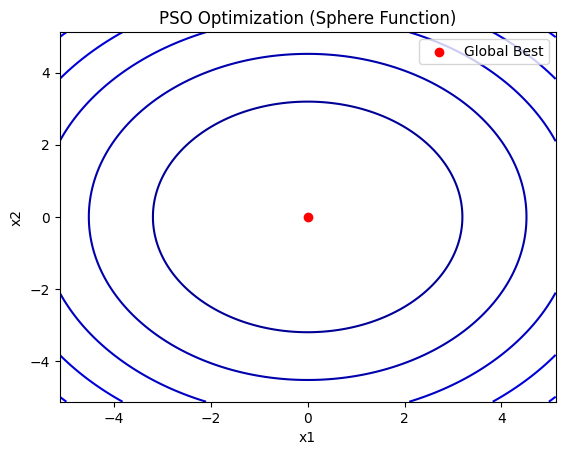

In [12]:
#sphere
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Sphere function)
def sphere(x):
    return sum(x_i**2 for x_i in x)

# PSO Parameters
n_particles = 50     # Number of particles
n_dimensions = 2     # Number of dimensions (parameters to optimize)
n_iterations = 100   # Number of iterations

w = 1              # Inertia weight
c1 = 1.5             # Cognitive coefficient (particle's own best position)
c2 = 1.5             # Social coefficient (global best position)
v_max = 2.0          # Maximum velocity

# Initialize particles' positions and velocities
positions = np.random.uniform(-5.12, 5.12, (n_particles, n_dimensions))
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Initialize personal best positions and global best position
pbest_positions = positions.copy()
pbest_values = np.apply_along_axis(sphere, 1, pbest_positions)

gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# PSO Main Loop
for t in range(n_iterations):
    # Evaluate fitness
    fitness_values = np.apply_along_axis(sphere, 1, positions)

    # Update personal bests
    for i in range(n_particles):
        if fitness_values[i] < pbest_values[i]:
            pbest_positions[i] = positions[i]
            pbest_values[i] = fitness_values[i]

    # Update global best
    min_fitness_idx = np.argmin(pbest_values)
    if pbest_values[min_fitness_idx] < gbest_value:
        gbest_position = pbest_positions[min_fitness_idx]
        gbest_value = pbest_values[min_fitness_idx]

    # Update velocity and position for each particle
    r1 = np.random.rand(n_particles, n_dimensions)
    r2 = np.random.rand(n_particles, n_dimensions)

    velocities = (w * velocities +
                  c1 * r1 * (pbest_positions - positions) +
                  c2 * r2 * (gbest_position - positions))

    # Apply velocity limits (optional)
    velocities = np.clip(velocities, -v_max, v_max)

    # Update positions
    positions = positions + velocities

    # Print the current best solution
    if t % 10 == 0:  # Print every 10 iterations
        print(f"Iteration {t}, Global Best Value: {gbest_value}")

# Final output
print(f"\nFinal Global Best Position: {gbest_position}")
print(f"Final Global Best Value: {gbest_value}")

# Plotting the optimization process (visualization for 2D case)
x_vals = np.linspace(-5.12, 5.12, 400)
y_vals = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = sphere([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(0, 500, 50), cmap='jet')
plt.scatter(gbest_position[0], gbest_position[1], color='red', label='Global Best')
plt.title("PSO Optimization (Sphere Function)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


Iteration 0, Global Best Value: 125.48595613412999
Iteration 10, Global Best Value: 120.55142551358836
Iteration 20, Global Best Value: 103.28440571999045
Iteration 30, Global Best Value: 61.61473057787748
Iteration 40, Global Best Value: 45.295191805395234
Iteration 50, Global Best Value: 6.016623387349
Iteration 60, Global Best Value: 0.06906692325731001
Iteration 70, Global Best Value: 3.7485557754735055e-05
Iteration 80, Global Best Value: 2.551362661051826e-05
Iteration 90, Global Best Value: 2.5455270929342078e-05

Final Global Best Position: [420.96874763 420.96874747]
Final Global Best Value: 2.5455132913521084e-05


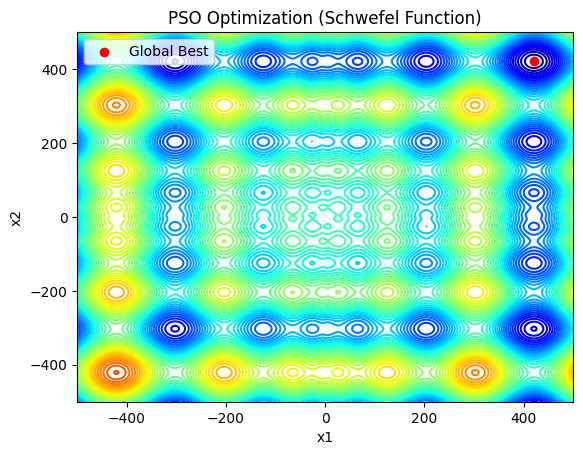

In [5]:
#schewful
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Schwefel function)
def schwefel(x):
    return 418.9829 * len(x) - sum(x_i * np.sin(np.sqrt(abs(x_i))) for x_i in x)

# PSO Parameters
n_particles = 100     # Number of particles
n_dimensions = 2     # Number of dimensions (parameters to optimize)
n_iterations = 100   # Number of iterations

w = 0.5              # Inertia weight
c1 = 1.7             # Cognitive coefficient (particle's own best position)
c2 = 1.3             # Social coefficient (global best position)
v_max = 2.0          # Maximum velocity

# Initialize particles' positions and velocities
positions = np.random.uniform(-500, 500, (n_particles, n_dimensions))
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Initialize personal best positions and global best position
pbest_positions = positions.copy()
pbest_values = np.apply_along_axis(schwefel, 1, pbest_positions)

gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# PSO Main Loop
for t in range(n_iterations):
    # Evaluate fitness
    fitness_values = np.apply_along_axis(schwefel, 1, positions)

    # Update personal bests
    for i in range(n_particles):
        if fitness_values[i] < pbest_values[i]:
            pbest_positions[i] = positions[i]
            pbest_values[i] = fitness_values[i]

    # Update global best
    min_fitness_idx = np.argmin(pbest_values)
    if pbest_values[min_fitness_idx] < gbest_value:
        gbest_position = pbest_positions[min_fitness_idx]
        gbest_value = pbest_values[min_fitness_idx]

    # Update velocity and position for each particle
    r1 = np.random.rand(n_particles, n_dimensions)
    r2 = np.random.rand(n_particles, n_dimensions)

    velocities = (w * velocities +
                  c1 * r1 * (pbest_positions - positions) +
                  c2 * r2 * (gbest_position - positions))

    # Apply velocity limits (optional)
    velocities = np.clip(velocities, -v_max, v_max)

    # Update positions
    positions = positions + velocities

    # Print the current best solution
    if t % 10 == 0:  # Print every 10 iterations
        print(f"Iteration {t}, Global Best Value: {gbest_value}")

# Final output
print(f"\nFinal Global Best Position: {gbest_position}")
print(f"Final Global Best Value: {gbest_value}")

# Plotting the optimization process (visualization for 2D case)
x_vals = np.linspace(-500, 500, 400)
y_vals = np.linspace(-500, 500, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = schwefel([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(0, 2000, 50), cmap='jet')
plt.scatter(gbest_position[0], gbest_position[1], color='red', label='Global Best')
plt.title("PSO Optimization (Schwefel Function)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


Iteration 0, Global Best Value: 0.37616026742604236
Iteration 10, Global Best Value: 0.18995357694981357
Iteration 20, Global Best Value: 0.03740600123908827
Iteration 30, Global Best Value: 0.010516120583452526
Iteration 40, Global Best Value: 0.009716862446424168

Final Global Best Position: [-2.59958966  1.75742238]
Final Global Best Value: 0.009716248624246415


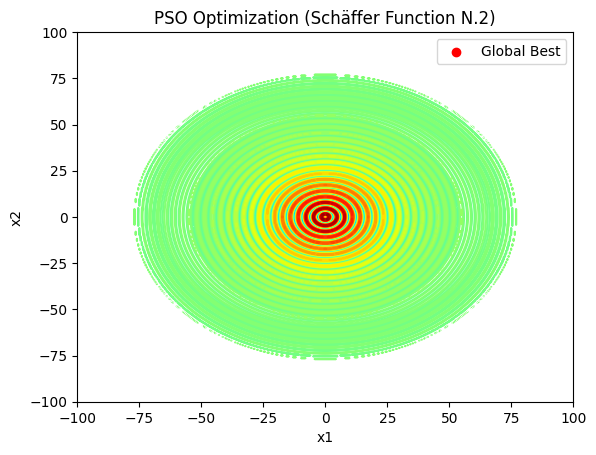

In [10]:
#schaffer
import numpy as np
import matplotlib.pyplot as plt

# Objective function (Schäffer Function N.2)
def schaffer(x):
    x1, x2 = x
    numerator = np.sin(np.sqrt(x1**2 + x2**2))**2 - 0.5
    denominator = (1 + 0.001 * (x1**2 + x2**2))**2
    return 0.5 + numerator / denominator

# PSO Parameters
n_particles = 100     # Number of particles
n_dimensions = 2     # Number of dimensions (parameters to optimize)
n_iterations = 50   # Number of iterations

w = 0.5              # Inertia weight
c1 = 1.5             # Cognitive coefficient (particle's own best position)
c2 = 1.5             # Social coefficient (global best position)
v_max = 2.0          # Maximum velocity

# Initialize particles' positions and velocities
positions = np.random.uniform(-100, 100, (n_particles, n_dimensions))
velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

# Initialize personal best positions and global best position
pbest_positions = positions.copy()
pbest_values = np.apply_along_axis(schaffer, 1, pbest_positions)

gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# PSO Main Loop
for t in range(n_iterations):
    # Evaluate fitness
    fitness_values = np.apply_along_axis(schaffer, 1, positions)

    # Update personal bests
    for i in range(n_particles):
        if fitness_values[i] < pbest_values[i]:
            pbest_positions[i] = positions[i]
            pbest_values[i] = fitness_values[i]

    # Update global best
    min_fitness_idx = np.argmin(pbest_values)
    if pbest_values[min_fitness_idx] < gbest_value:
        gbest_position = pbest_positions[min_fitness_idx]
        gbest_value = pbest_values[min_fitness_idx]

    # Update velocity and position for each particle
    r1 = np.random.rand(n_particles, n_dimensions)
    r2 = np.random.rand(n_particles, n_dimensions)

    velocities = (w * velocities +
                  c1 * r1 * (pbest_positions - positions) +
                  c2 * r2 * (gbest_position - positions))

    # Apply velocity limits (optional)
    velocities = np.clip(velocities, -v_max, v_max)

    # Update positions
    positions = positions + velocities

    # Print the current best solution
    if t % 10 == 0:  # Print every 10 iterations
        print(f"Iteration {t}, Global Best Value: {gbest_value}")

# Final output
print(f"\nFinal Global Best Position: {gbest_position}")
print(f"Final Global Best Value: {gbest_value}")

# Plotting the optimization process (visualization for 2D case)
x_vals = np.linspace(-100, 100, 400)
y_vals = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = schaffer([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(0, 1, 50), cmap='jet')
plt.scatter(gbest_position[0], gbest_position[1], color='red', label='Global Best')
plt.title("PSO Optimization (Schäffer Function N.2)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

